# <span style="color:red"> Lezione 02 </span>
## <span style="color:green"> Esercizio 02.1 </span>

Ho calcolato tramite metodi Monte-Carlo l'integrale
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ 
utilizzando sia una distribuzione uniforme sia un importance sampling. Definendo $f(x) = \frac{\pi}{2}\cos(\pi x/2)$ e generando $x_i$ tramite una distribuzione uniforme in $\mathrm{[0,1)}$, ho ottenuto il valore dell'integrale tramite il calcolo di $$ I = \frac{1}{N} \sum^N_{i=0}{f(x_i)} ,$$ con $N = 10^4$.
Tramite questo metodo ho ottenuto il risultato di sampling uniforme. 

Invece, ho compiuto l'importance sampling generando $x$ tra $\mathrm{[0,1)}$, ma questa volta tramite una distribuzione esponenziale con $\lambda= 1$ e un fattore di normalizzazione pari a $(1-\frac{1}{e})^{-1}$, scelto in modo da rendere unitario l'integrale tra zero ed uno della distribuzione. Quindi, ho ottenuto l'integrale $I$ tramite il calcolo di $$ I = \frac{1}{N} \sum^N_{i=0}{g(x_i)} ,$$ con $g(x)=f(x) \cdot e^x(1-\frac{1}{e})$, dove $e^x(1-\frac{1}{e})$ è l'inverso della distribuzione esponenziale utilizzata.

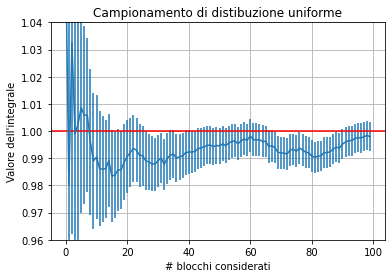

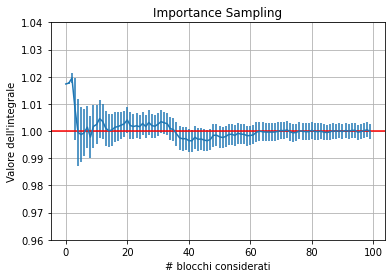

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.table import Table


Names = np.array(["mean_raw","errors_raw","mean_imp","errs_imp"])
datas = Table.read("Data.txt",format="ascii",names=Names)

mean = np.array(datas["mean_raw"])
errors = np.array(datas["errors_raw"])
mean_imp = np.array(datas["mean_imp"])
errs_imp = np.array(datas["errs_imp"])
N = len(mean)
x = np.arange(N)
    
plt.errorbar(x,mean,yerr=errors)
plt.title("Campionamento di distibuzione uniforme")
plt.xlabel("# blocchi considerati")
plt.ylabel("Valore dell'integrale")
plt.ylim(0.960,1.040)
plt.axhline(1.00,color="r")
plt.grid(True)
plt.show()

plt.errorbar(x,mean_imp,yerr=errs_imp)
plt.title("Importance Sampling")
plt.ylim(0.960,1.040)
plt.xlabel("# blocchi considerati")
plt.ylabel('Valore dell\'integrale')
plt.axhline(1.00,color="r")

plt.grid(True)
plt.show()

Si nota che, coerentemente alle attese, l'importance sampling ha un'incertezza ridotta rispetto al sampling fatto con una distribuzione uniforme (le scale sulle y sono identiche).  Tuttavia, in entrambi i casi la stima dell'integrale è all'interno di $\sigma$ rispetto al valore analitico, quindi $N=10^4$ è stato sufficiente per ottenere una buona convergenza.

## <span style="color:green"> Esercizio 02.2 </span>

Ho compiuto due serie di $10^4$ random walks, divisi in 100 blocchi e fatti andare avanti per 1000 passi ciascuno.
La prima serie è stata generata operando step casuali avanti o indietro lungo le coordinate, ovvero aumentando o diminuendo di 1 una tra le coordinate x,y,z ad ogni step. \
Nella seconda sono stati generati step di modulo 1 in una direzione casuale ottenuta generando due angoli, $\theta \in [0,2\pi)$ e $\phi \in [0,\pi)$, da una distribuzione uniforme. 

In entrambi i casi ho ottenuto la distanza media dal centro (con relativa incertezza statistica) tra tutti i $10^4$ random walks per ognuno dei 1000 passi.

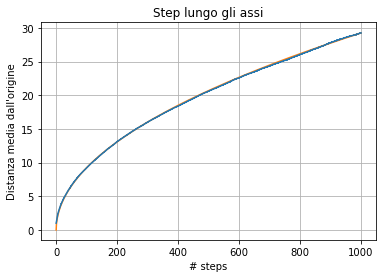

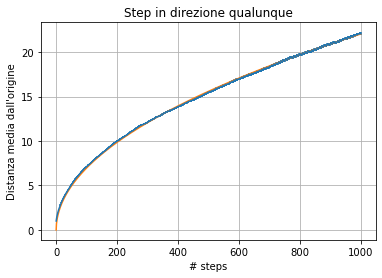

In [42]:
Names_walks = np.array(["mean_discr","errors_discr","mean_cont","errs_cont"])
data_walks = Table.read("Walks.txt",format="ascii",names=Names_walks)

mean_discr = np.array(data_walks["mean_discr"])
errors_discr = np.array(data_walks["errors_discr"])
mean_cont = np.array(data_walks["mean_cont"])
errors_cont = np.array(data_walks["errs_cont"])

M = len(mean_discr)
x_walks = np.arange(M)

plt.errorbar(x_walks,mean_discr,yerr=errors_discr)
plt.title('Step lungo gli assi')
plt.xlabel('# steps')
plt.ylabel('Distanza media dall\'origine')
plt.grid(True)
plt.plot(x_walks,0.925*np.sqrt(x_walks)) #ho fatto il fit "a mano"
plt.show()


plt.errorbar(x_walks,mean_cont,yerr=errors_cont)
plt.title('Step in direzione qualunque')
plt.xlabel('# steps')
plt.ylabel('Distanza media dall\'origine')
plt.plot(x_walks,0.697*np.sqrt(x_walks)) #ho fatto il fit "a mano"
plt.grid(True)
plt.show()

Notiamo che in entrambi i casi il fit con una funzione del tipo $f(t) = k\sqrt{t}$ è eccellente. Questa è chiara indicazione di comportamento diffusivo, infatti, data una probabilità di transizione $p(x,t)$, sappiamo dalla teoria che $$\langle x^2 \rangle =2Dt ,$$ dal quale segue immediatamente $$d = \sqrt{\langle x^2 \rangle} = k\sqrt{t} ,$$ dove $d$ è la distanza dal centro e $k = \sqrt{2D} .$